<a href="https://colab.research.google.com/github/Diegoferrua/ProyectoBIGDATA_AS/blob/main/ETL_Modelo_Basico_POST1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv
import re
import time
import string
import numpy as np
from sklearn import preprocessing, model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import nltk
nltk.download('popular')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import pandas as pd
from matplotlib import pyplot as plt
#VADER es una biblioteca especificamente diseñada para el análisis de sentimientos en texto de redes sociales

from nltk.sentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=f1107d89877f5e333f70f8a77f43f4d2bd04113fca314c90eb237db703ebf55f
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
data = spark.read.csv('igfinal.csv', header=True, sep=",")
data.show(10)

+------------------+--------------------+
|              Name|             Comment|
+------------------+--------------------+
|       gymfiticons|       FACTS‼️💪🏼🔥|
|        flores_shf|    Facts big Wes 🙌|
|     rabbit_fitnss|        🦍🦍🦍👌🏽💯|
|    rich_elegance_|        Big facts 💯|
|       hqmclothing|               FACTO|
|    kevineckelmann|Talk that shit bi...|
|         govergego|            💪🏼💯‼️|
|   jacob.smith.fit|                  💯|
|savagestonersavant|           He got it|
|savagestonersavant|    You got diss Wes|
+------------------+--------------------+
only showing top 10 rows



In [ ]:
data.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Comment: string (nullable = true)



In [ ]:
df = data.toPandas()
print(df)

                        Name  \
0                gymfiticons   
1                 flores_shf   
2              rabbit_fitnss   
3             rich_elegance_   
4                hqmclothing   
..                       ...   
234              cuzzsantana   
235         zaczhourofficial   
236                  b_t_h83   
237               the.sinsei   
238  literallymyicloudbackup   

                                               Comment  
0                                           FACTS‼️💪🏼🔥  
1                                      Facts big Wes 🙌  
2                                               🦍🦍🦍👌🏽💯  
3                                          Big facts 💯  
4                                                FACTO  
..                                                 ...  
234  @cuzzsantana from Nothing ! Born 1984 . Rich.R...  
235                                                 🔥🔥  
236    @ericabyrness shows you’ve never had a real man  
237                               Straight no

In [ ]:
df.size # Esto imprimirá el número total de elementos en el DataFrame

478

In [ ]:
df.columns

Index(['Name', 'Comment'], dtype='object')

In [ ]:
def analizar_sentimiento(texto):
    if texto is None or pd.isnull(texto):
        return np.nan

    sia = SentimentIntensityAnalyzer()
    sentimiento = sia.polarity_scores(str(texto))["compound"]

    if sentimiento > 0.1:
        return "Sentimiento Positivo"
    elif sentimiento < 0:
        return "Sentimiento Negativo"
    else:
        return "Sentimiento Neutral"


In [ ]:
sia= SentimentIntensityAnalyzer()

In [ ]:
df.columns

Index(['Name', 'Comment'], dtype='object')

In [ ]:
df['Sentimiento'] = df['Comment'].apply(analizar_sentimiento)
df.head(10)

,Name,Comment,Sentimiento
0,gymfiticons,FACTS‼️💪🏼🔥,Sentimiento Neutral
1,flores_shf,Facts big Wes 🙌,Sentimiento Neutral
2,rabbit_fitnss,🦍🦍🦍👌🏽💯,Sentimiento Neutral
3,rich_elegance_,Big facts 💯,Sentimiento Neutral
4,hqmclothing,FACTO,Sentimiento Neutral
5,kevineckelmann,Talk that shit big homie 💪,Sentimiento Negativo
6,govergego,💪🏼💯‼️,Sentimiento Neutral
7,jacob.smith.fit,💯,Sentimiento Neutral
8,savagestonersavant,He got it,Sentimiento Neutral
9,savagestonersavant,You got diss Wes,Sentimiento Neutral


In [ ]:
def clean_text3(Comment):
  text = re.sub(r'^RT[\s]+', '', Comment)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', Comment)
  text = re.sub(r'#', '', Comment)
  text = re.sub(r'@[A-Za-z0-9]+', '', Comment)
  return text

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargar el léxico de VADER
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Emoticones que indican Sentimiento Positivo
emoticones_positivos = ["😂", "🙌", "🚀", "👏", "🔥", "🤘", "💯", "❤️", "🤣","🙌🏼", "🫡", "😘", "😎", "🙏"]


def analizar_sentimiento(comment_limpo):
    if comment_limpo is None or pd.isnull(comment_limpo):
        return np.nan

    sentimiento = sia.polarity_scores(comment_limpo)["compound"]

    # Analizar si el texto contiene emoticones positivos
    for emoticon in emoticones_positivos:
        if emoticon in comment_limpo:
            return "Positivo"

    if sentimiento > 0.1:
        return "Positivo"
    elif sentimiento < 0:
        return "Negativo"
    else:
        return "Neutral"


# Luego, puedes usar esta función para analizar el sentimiento en tus comentarios limpios
df['Sentimiento2'] = df['Comment'].apply(analizar_sentimiento)
df.head(10)  # Seleccionar las columnas que deseas imprimir


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Name,Comment,Sentimiento,Sentimiento2
0,gymfiticons,FACTS‼️💪🏼🔥,Sentimiento Neutral,Positivo
1,flores_shf,Facts big Wes 🙌,Sentimiento Neutral,Positivo
2,rabbit_fitnss,🦍🦍🦍👌🏽💯,Sentimiento Neutral,Positivo
3,rich_elegance_,Big facts 💯,Sentimiento Neutral,Positivo
4,hqmclothing,FACTO,Sentimiento Neutral,Neutral
5,kevineckelmann,Talk that shit big homie 💪,Sentimiento Negativo,Negativo
6,govergego,💪🏼💯‼️,Sentimiento Neutral,Positivo
7,jacob.smith.fit,💯,Sentimiento Neutral,Positivo
8,savagestonersavant,He got it,Sentimiento Neutral,Neutral
9,savagestonersavant,You got diss Wes,Sentimiento Neutral,Neutral


Counter({'Positivo': 169, 'Neutral': 48, 'Negativo': 22})


<Axes: xlabel='Sentimiento2', ylabel='count'>

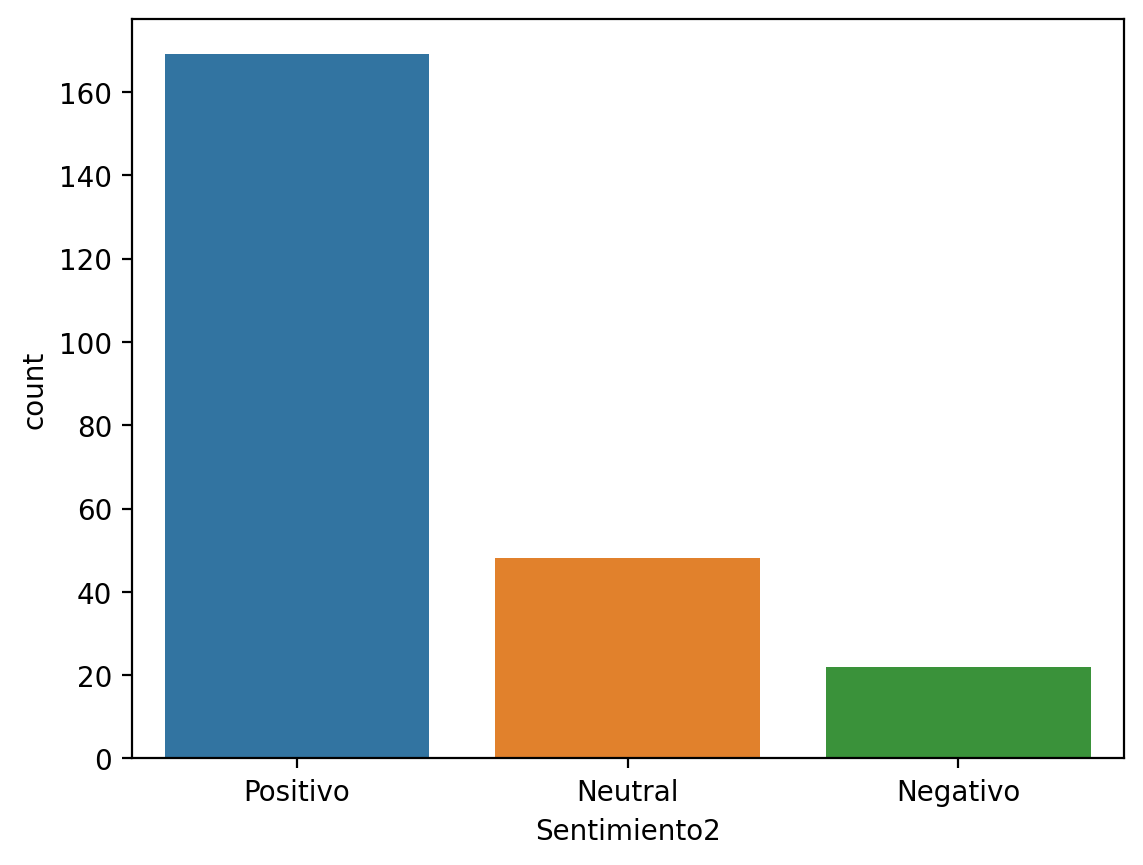

In [ ]:
x = df.Comment
y = df.Sentimiento2

from collections import Counter

print(Counter(y))
sns.countplot(x=y)

In [ ]:
df.head(10)

,Name,Comment,Sentimiento,Sentimiento2
0,gymfiticons,FACTS‼️💪🏼🔥,Sentimiento Neutral,Positivo
1,flores_shf,Facts big Wes 🙌,Sentimiento Neutral,Positivo
2,rabbit_fitnss,🦍🦍🦍👌🏽💯,Sentimiento Neutral,Positivo
3,rich_elegance_,Big facts 💯,Sentimiento Neutral,Positivo
4,hqmclothing,FACTO,Sentimiento Neutral,Neutral
5,kevineckelmann,Talk that shit big homie 💪,Sentimiento Negativo,Negativo
6,govergego,💪🏼💯‼️,Sentimiento Neutral,Positivo
7,jacob.smith.fit,💯,Sentimiento Neutral,Positivo
8,savagestonersavant,He got it,Sentimiento Neutral,Neutral
9,savagestonersavant,You got diss Wes,Sentimiento Neutral,Neutral


In [ ]:
df['SCORE'] = df.Sentimiento2

In [ ]:
# Reemplazar etiqueta para el conjunto de datos
df['SCORE'] = df['Sentimiento2'].map({'Positivo': 2, 'Negativo': 0, 'Neutral': 1})
df.head(10)


,Name,Comment,Sentimiento,Sentimiento2,SCORE
0,gymfiticons,FACTS‼️💪🏼🔥,Sentimiento Neutral,Positivo,2
1,flores_shf,Facts big Wes 🙌,Sentimiento Neutral,Positivo,2
2,rabbit_fitnss,🦍🦍🦍👌🏽💯,Sentimiento Neutral,Positivo,2
3,rich_elegance_,Big facts 💯,Sentimiento Neutral,Positivo,2
4,hqmclothing,FACTO,Sentimiento Neutral,Neutral,1
5,kevineckelmann,Talk that shit big homie 💪,Sentimiento Negativo,Negativo,0
6,govergego,💪🏼💯‼️,Sentimiento Neutral,Positivo,2
7,jacob.smith.fit,💯,Sentimiento Neutral,Positivo,2
8,savagestonersavant,He got it,Sentimiento Neutral,Neutral,1
9,savagestonersavant,You got diss Wes,Sentimiento Neutral,Neutral,1


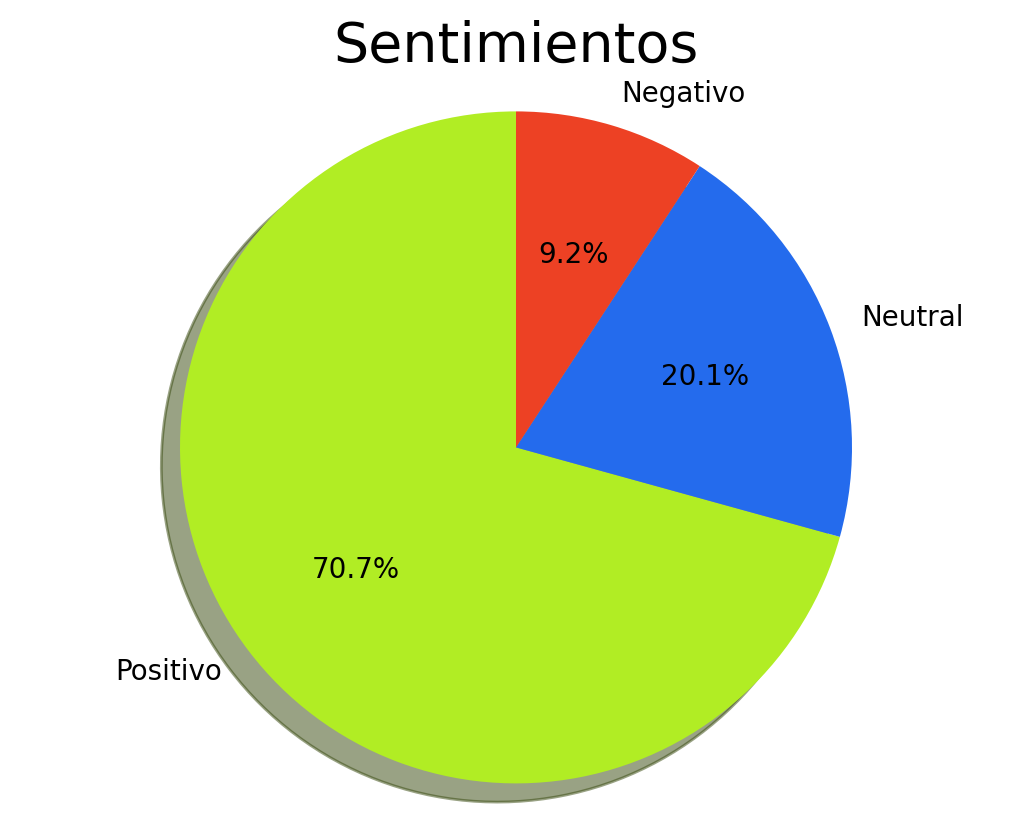

In [ ]:
import matplotlib.pyplot as plt

labels = 'Positivo', 'Neutral', 'Negativo'
colors = ['#B1ED24', '#246BED', '#ED4124']

plt.pie(df['SCORE'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Sentimientos', fontsize=20)
plt.axis('equal')
plt.show()


In [ ]:
print(df.columns)

Index(['Name', 'Comment', 'Sentimiento', 'Sentimiento2', 'SCORE'], dtype='object')


In [ ]:
dfNew = df[['Sentimiento2','SCORE']]
dfNew.head()

,Sentimiento2,SCORE
0,Positivo,2
1,Positivo,2
2,Positivo,2
3,Positivo,2
4,Neutral,1


In [ ]:
df

,Name,Comment,Sentimiento,Sentimiento2,SCORE
0,gymfiticons,FACTS‼️💪🏼🔥,Sentimiento Neutral,Positivo,2
1,flores_shf,Facts big Wes 🙌,Sentimiento Neutral,Positivo,2
2,rabbit_fitnss,🦍🦍🦍👌🏽💯,Sentimiento Neutral,Positivo,2
3,rich_elegance_,Big facts 💯,Sentimiento Neutral,Positivo,2
4,hqmclothing,FACTO,Sentimiento Neutral,Neutral,1
...,...,...,...,...,...
234,cuzzsantana,@cuzzsantana from Nothing ! Born 1984 . Rich.R...,Sentimiento Neutral,Positivo,2
235,zaczhourofficial,🔥🔥,Sentimiento Neutral,Positivo,2
236,b_t_h83,@ericabyrness shows you’ve never had a real man,Sentimiento Neutral,Neutral,1
237,the.sinsei,Straight no chase💯💯💯,Sentimiento Negativo,Positivo,2


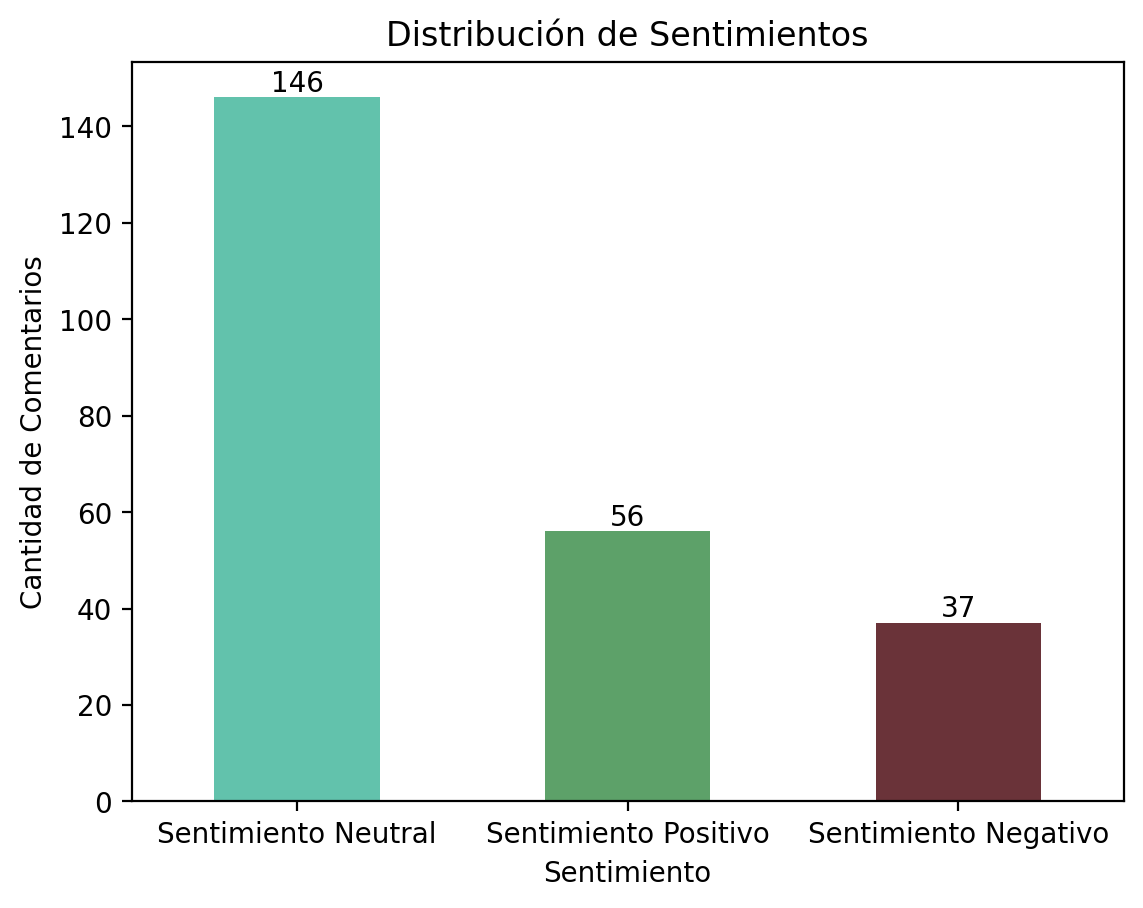

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asignar valores a la columna 'compound' basándose en la columna 'SCORE'
df['compound'] = df['SCORE'].map({1.0: 'Positivo', 2.0: 'Neutro', 0.0: 'Negativo'})

#df['compound'] = df['SCORE'].map({1.0: 0.1, 2.0: 0, 0.0: -0.1})

# Gráfico de Barras para el Sentimiento con colores y etiquetas
sentimiento_counts = df['Sentimiento'].value_counts()
colors = ['#62C2AC', '#5DA169', '#6A3339']  # Colores para cada categoría de sentimiento
sentimiento_counts.plot(kind='bar', color=colors)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')

# Agregar etiquetas en las barras
for i, count in enumerate(sentimiento_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotar las etiquetas del eje x
plt.xticks(rotation=0)
plt.show()


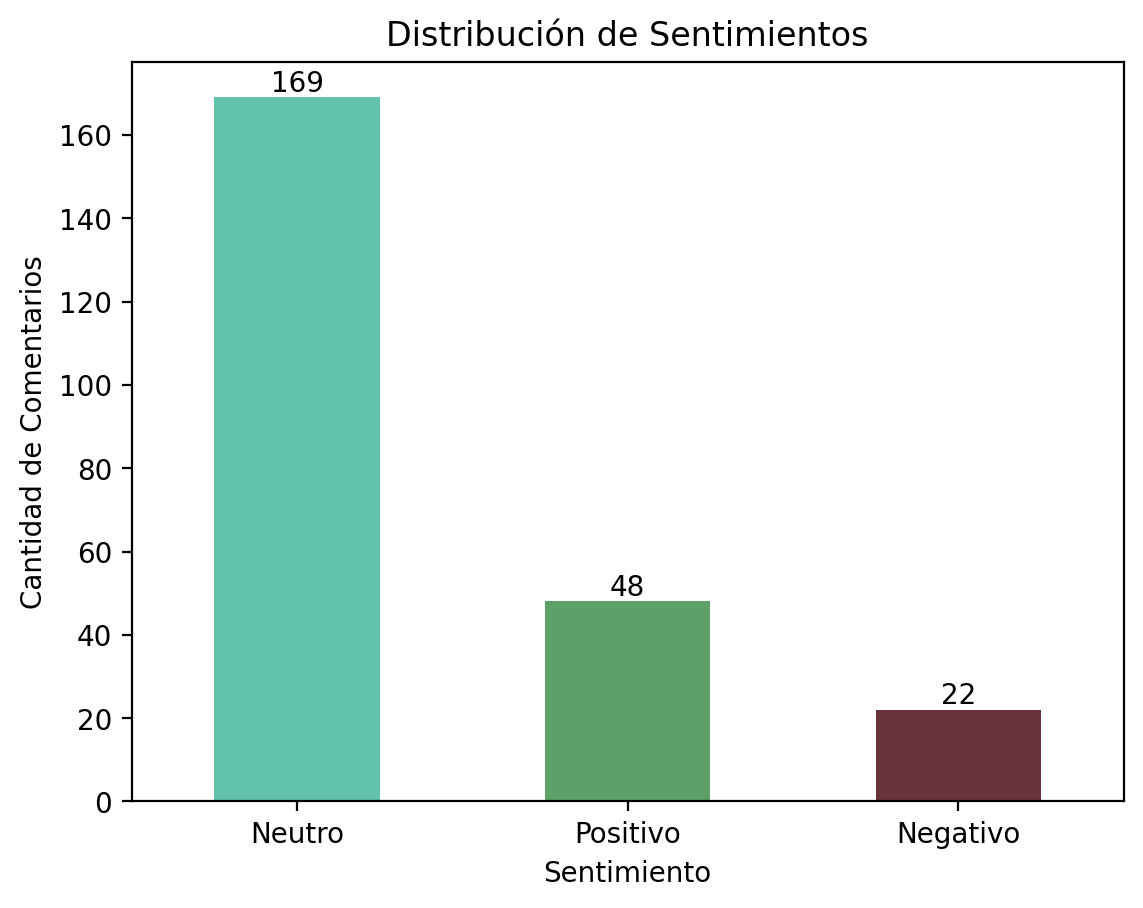

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asignar valores a la columna 'compound' basándose en la columna 'SCORE'
df['compound'] = df['SCORE'].map({1.0: 'Positivo', 2.0: 'Neutro', 0.0: 'Negativo'})

# Gráfico de Barras para el Sentimiento con colores y etiquetas
sentimiento_counts = df['compound'].value_counts()
colors = ['#62C2AC', '#5DA169', '#6A3339']  # Colores para cada categoría de sentimiento
sentimiento_counts.plot(kind='bar', color=colors)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')

# Agregar etiquetas en las barras
for i, count in enumerate(sentimiento_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)  # Rotar las etiquetas del eje x
plt.show()


In [ ]:
# Asignación aleatoria de datos de entrenamiento y prueba
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Eliminar filas con valores nulos en la columna 'Comment'
train_clean = train.dropna(subset=['Comment'])

# Crear un nuevo vectorizador
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

# Ajustar y transformar los datos de entrenamiento
train_matrix = vectorizer.fit_transform(train_clean['Comment'])

# Transformar los datos de prueba (ten en cuenta que no estamos ajustando nuevamente)
test_matrix = vectorizer.transform(test['Comment'])



In [ ]:
# REGRESION LINEAL
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['SCORE']
y_test = test['SCORE']

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

def mide_error(nombre_modelo, y_pred):
    auc = roc_auc_score(y_test, y_pred)
    print(f'AUC de {nombre_modelo}: ', round(auc,2))

In [ ]:
from sklearn.metrics import roc_auc_score

def mide_error(nombre_modelo, y_pred):
    if len(np.unique(y_test)) > 2:
        # Si es un problema de clasificación múltiple, utilizamos 'ovr' en roc_auc_score
        auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
    else:
        # Si es un problema de clasificación binaria, tomamos las probabilidades de la clase positiva
        auc = roc_auc_score(y_test, y_pred[:, 1])

    print(f'AUC de {nombre_modelo}: ', round(auc, 2))



# CALCULO DE ERROR REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg', C=1.0)  # Puedes ajustar el valor de C
logreg.fit(X_train, y_train)

# Usamos predict_proba para obtener probabilidades
y_pred_proba = logreg.predict_proba(X_test)

# Medimos el error
mide_error('Regresión Logística', y_pred_proba)


AUC de Regresión Logística:  0.61


In [ ]:
# CALCULO DE ERROR NAIVE BAYES
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)

# Usamos predict_proba para obtener probabilidades
y_pred_proba_nb = naive_bayes.predict_proba(X_test)

# Medimos el error
mide_error('Naive Bayes', y_pred_proba_nb)


AUC de Naive Bayes:  0.72


In [ ]:
# CALCULO DE ERROR ARBOL DE DECISION
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Usamos predict_proba para obtener probabilidades
y_pred_proba_tree = tree.predict_proba(X_test)

# Medimos el error
mide_error('Árbol de Decisión', y_pred_proba_tree)


AUC de Árbol de Decisión:  0.61


In [ ]:
# CALCULO DE ERROR RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Usamos predict_proba para obtener probabilidades
y_pred_proba_rf = random_forest.predict_proba(X_test)

# Medimos el error
mide_error('Random Forest', y_pred_proba_rf)


AUC de Random Forest:  0.71


In [ ]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix, classification_report

# 'predictions' es la variable que contiene las predicciones
# 'y_test' es la variable que contiene las etiquetas verdaderas

# Convierte 'y_test' a un arreglo NumPy si aún no lo está
y_true = np.asarray(y_test)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(predictions, y_true)

# Muestra la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Calcula y muestra el informe de clasificación
class_report = classification_report(predictions, y_true)
print("\nInforme de Clasificación:")
print(class_report)


Matriz de Confusión:
[[ 1  0  0]
 [ 0  1  2]
 [ 2  9 34]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.10      0.33      0.15         3
           2       0.94      0.76      0.84        45

    accuracy                           0.73        49
   macro avg       0.46      0.70      0.50        49
weighted avg       0.88      0.73      0.79        49



In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.10      0.33      0.15         3
           2       0.94      0.76      0.84        45

    accuracy                           0.73        49
   macro avg       0.46      0.70      0.50        49
weighted avg       0.88      0.73      0.79        49



**DE AQUI PA ARRIBA TODO GOOD**